In [1]:
import hashlib, glob, pathlib

In [3]:
files = [pathlib.Path(f).stem for f in glob.glob(r"D:\ig_pipeline\qa-merged\*")]
print(files)

['acetone_atomizer', 'acorn', 'address', 'agave', 'air_conditioner', 'air_filter', 'air_freshener_atomizer', 'alarm_clock', 'allen_wrench', 'allspice_shaker', 'alphabet_abacus', 'aluminum_foil', 'ammonia_water_atomizer', 'antlers', 'apple', 'apple_pie', 'apricot', 'apron', 'arbor', 'arched_window', 'architectural_plan', 'arepa', 'armchair', 'artichoke', 'arugula', 'ashtray', 'asparagus', 'auricularia', 'avocado', 'axe', 'baby_bottle', 'baby_shoe', 'background', 'backpack', 'bacon', 'bagel', 'bagel_dough', 'baguette', 'bag_of_auricularia', 'bag_of_breadcrumbs', 'bag_of_brown_rice', 'bag_of_chips', 'bag_of_cookies', 'bag_of_cream_cheese', 'bag_of_fertilizer', 'bag_of_flour', 'bag_of_ice_cream', 'bag_of_jerky', 'bag_of_mulch', 'bag_of_oranges', 'bag_of_popcorn', 'bag_of_rice', 'bag_of_rubbish', 'bag_of_shiitake', 'bag_of_snacks', 'bag_of_starch', 'bag_of_tea', 'bag_of_yeast', 'bait', 'baking_powder_jar', 'baking_sheet', 'balloon', 'banana', 'banana_bread', 'bandage', 'bandana', 'bap', 'ba

In [16]:
batch_count = 20
seed = "potato"
batches = []
cat_to_batch = {}
for i in range(batch_count):
    batch = [cat for cat in files if int(hashlib.md5((cat + seed).encode()).hexdigest(), 16) % batch_count == i]
    batches.append(batch)
    for cat in batch:
        cat_to_batch[cat] = i

In [30]:
cat_to_batch["hamper"]

6

In [26]:
import json
bench_scales = {pathlib.Path(x).stem: json.loads(pathlib.Path(x).read_text())["scale"] for cat in batches[14] for x in glob.glob(str(pathlib.Path(r"D:\ig_pipeline\qa-merged") / cat / "*.json"))}

In [29]:
bench_scales

{'cvknrh': [1.0, 1.0, 1.0],
 'trwyaq': [1.0, 1.0, 1.0],
 'vqwovi': [1.0, 1.0, 1.0],
 'hhtbuy': [1.0, 1.0, 1.0],
 'fntqmd': [1.0, 1.0, 1.0],
 'rlejxx': [1.0, 1.0, 1.0],
 'ixhbmk': [1.0, 1.0, 1.0],
 'ivmsdt': [1.0, 1.0, 1.0],
 'jfsovh': [1.0, 1.0, 1.0],
 'ldpbcu': [1.0, 1.0, 1.0],
 'omsbux': [1.0, 1.0, 1.0],
 'padfds': [1.0, 1.0, 1.0],
 'xeskbh': [1.0, 1.0, 1.0],
 'ecqxgd': [1.0, 1.0, 1.0],
 'adrvdv': [1.0, 1.0, 1.0],
 'esagiq': [1.0, 1.0, 1.0],
 'fdxevw': [1.0, 1.0, 1.0],
 'ftvzzg': [1.0, 1.0, 1.0],
 'hezgut': [1.0, 1.0, 1.0],
 'jaklov': [1.0, 1.0, 1.0],
 'jvygiq': [1.0, 1.0, 1.0],
 'kpeeai': [1.0, 1.0, 1.0],
 'nnzwxs': [1.0, 1.0, 1.0],
 'nokayw': [1.0, 1.0, 1.0],
 'nzsfrw': [1.0, 1.0, 1.0],
 'pcymmc': [1.0, 1.0, 1.0],
 'pfjnnj': [1.0, 1.0, 1.0],
 'qhuvow': [1.0, 1.0, 1.0],
 'sfglvm': [1.0, 1.0, 1.0],
 'sihckt': [1.0, 1.0, 1.0],
 'sntjne': [1.0, 1.0, 1.0],
 'svnyht': [1.0, 1.0, 1.0],
 'uuhugq': [1.0, 1.0, 1.0],
 'wtkahs': [1.0, 1.0, 1.0],
 'wvtbnn': [1.0, 1.0, 1.0],
 'xwphjd': [1.0, 1.0

In [31]:
# Average number of changed scales by batch
batches_scales = [
  {pathlib.Path(x).stem: json.loads(pathlib.Path(x).read_text())["scale"] for cat in batch for x in glob.glob(str(pathlib.Path(r"D:\ig_pipeline\qa-merged") / cat / "*.json"))}
  for batch in batches
]

In [34]:
import numpy as np
num_scaled = [
  len([obj for obj, scale in batch_scales.items() if not np.allclose(scale, 1.0)]) / len(batch_scales)
  for batch_scales in batches_scales
]

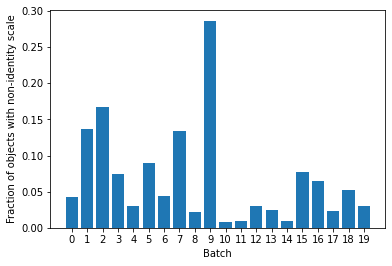

In [37]:
# Bar-plot the number of changed scales by batch
import matplotlib.pyplot as plt
plt.bar(range(batch_count), num_scaled)
plt.xlabel("Batch")
plt.xticks(range(batch_count), range(batch_count))
plt.ylabel("Fraction of objects with non-identity scale")
plt.show()